In [4]:
import pandas as pd
df=pd.read_excel("data\sample_nielsen_extended.xlsx",sheet_name="Sheet1")
print(df.duplicated().sum())

df=df.drop_duplicates()
print(df.isnull().sum())
df=df.dropna()
df

0
date           0
market         0
channel        0
category       0
brand          0
value_sales    0
unit_sales     0
share          0
Month-Year     0
dtype: int64


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\T8567\AppData\Local\Temp\ipykernel_32628\3519133365.py:2: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_excel("data\sample_nielsen_extended.xlsx",sheet_name="Sheet1")


,date,market,channel,category,brand,value_sales,unit_sales,share,Month-Year
0,2019-01-01,India,Modern Trade,Biscuits,Alpha,1278536.23,130574.52,30.97,Jan-2019
1,2019-01-01,India,Modern Trade,Biscuits,Beta,1080513.18,110350.79,26.17,Jan-2019
2,2019-01-01,India,Modern Trade,Biscuits,Gamma,967086.19,98766.70,23.43,Jan-2019
3,2019-01-01,India,Modern Trade,Biscuits,Delta,802164.15,81923.53,19.43,Jan-2019
4,2019-01-01,India,Modern Trade,Beverages,Fizz,3155632.13,179043.78,34.56,Jan-2019
...,...,...,...,...,...,...,...,...,...
667,2025-12-01,India,Modern Trade,Biscuits,Delta,905754.25,88496.43,18.78,Dec-2025
668,2025-12-01,India,Modern Trade,Beverages,Fizz,3300088.40,179130.05,30.87,Dec-2025
669,2025-12-01,India,Modern Trade,Beverages,Splash,3029884.73,164463.29,28.34,Dec-2025
670,2025-12-01,India,Modern Trade,Beverages,Hydra,2352359.41,127686.96,22.01,Dec-2025


C:\Users\ARYAN\AppData\Local\Temp\ipykernel_28240\1435407374.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="date", freq="M"))["value_sales"]


          ds            y
0 2019-01-31  13258162.43
1 2019-02-28  13455414.31
2 2019-03-31  13597761.00
3 2019-04-30  14121181.92
4 2019-05-31  13799790.49


20:17:25 - cmdstanpy - INFO - Chain [1] start processing
20:17:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ARYAN\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(



Forecast (last 12 rows):
           ds          yhat    yhat_lower    yhat_upper            y
78 2025-07-31  1.480569e+07  1.438401e+07  1.522635e+07  14460497.50
79 2025-08-31  1.434129e+07  1.393988e+07  1.479790e+07  14418488.96
80 2025-09-30  1.397532e+07  1.354768e+07  1.439247e+07  14642123.53
81 2025-10-31  1.449699e+07  1.407188e+07  1.494738e+07  14016540.78
82 2025-11-30  1.521485e+07  1.478280e+07  1.564196e+07  14965033.73
83 2025-12-31  1.571238e+07  1.529058e+07  1.621293e+07  15513259.07
84 2026-01-31  1.662167e+07  1.617184e+07  1.705345e+07          NaN
85 2026-02-28  1.726320e+07  1.681240e+07  1.767477e+07          NaN
86 2026-03-31  1.711913e+07  1.668557e+07  1.755313e+07          NaN
87 2026-04-30  1.737705e+07  1.693852e+07  1.781906e+07          NaN
88 2026-05-31  1.692255e+07  1.647369e+07  1.733404e+07          NaN
89 2026-06-30  1.617933e+07  1.573182e+07  1.660303e+07          NaN

Saved: prophet_forecast_total_sales.csv


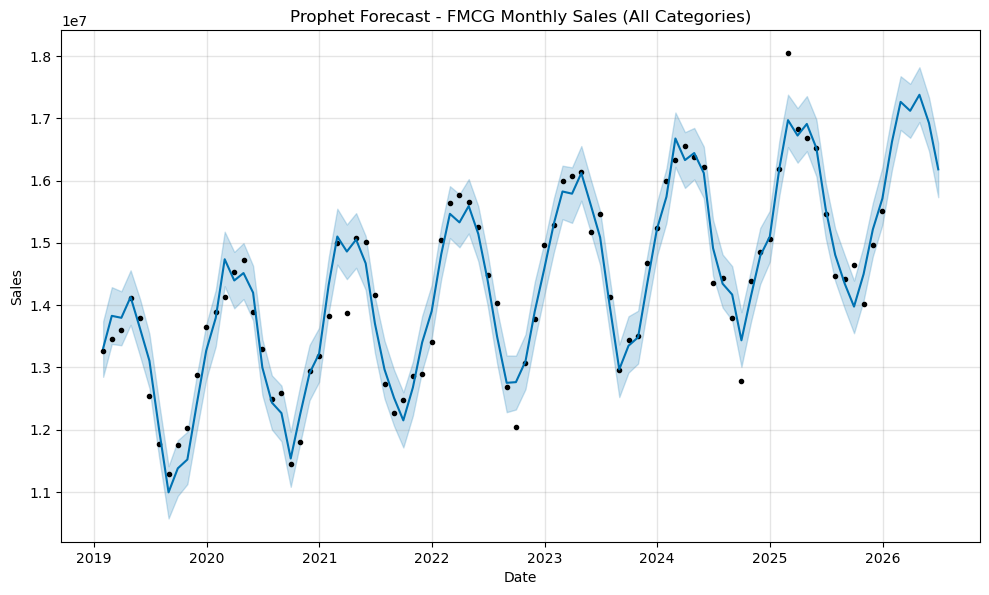

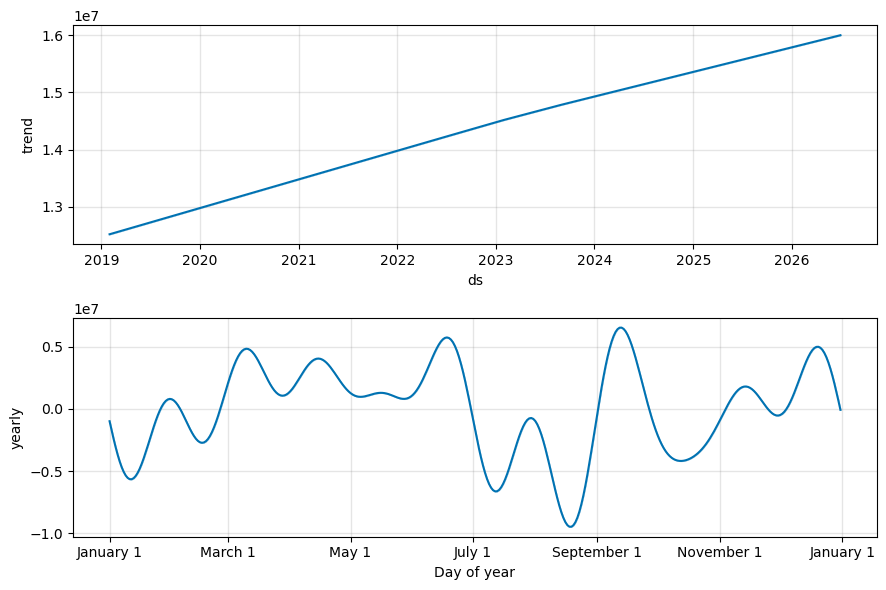

In [ ]:
# --- Install (Colab/Kaggle/Local) ---
# If running locally, uncomment the next line in a terminal:  pip install prophet
# In notebooks, run:
# !pip install prophet openpyxl pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# ----------------------------

# 1) LOAD & PREP DATA
# ----------------------------
# Path to your file
FILE = "data/sample_nielsen_extended.xlsx"   # change path if needed

# Read the detailed sheet (has a 'date' column)
df = pd.read_excel(FILE, sheet_name="Sheet1")

# Ensure proper datetime
df["date"] = pd.to_datetime(df["date"])

# Aggregate to MONTHLY total value_sales (all brands/categories combined)
monthly = (
    df.groupby(pd.Grouper(key="date", freq="M"))["value_sales"]
      .sum()
      .reset_index()
      .rename(columns={"date": "ds", "value_sales": "y"})
)

# (Optional) ensure chronological order and no missing months
monthly = monthly.sort_values("ds").reset_index(drop=True)

# Quick sanity check
print(monthly.head())

# ----------------------------
# 2) FIT PROPHET
# ----------------------------
m = Prophet(
    yearly_seasonality=True,  # business data often has yearly seasonality
    weekly_seasonality=False,
    daily_seasonality=False
)
m.fit(monthly)

# ----------------------------
# 3) FORECAST NEXT 6 MONTHS
# ----------------------------
future = m.make_future_dataframe(periods=6, freq="M")
fcst = m.predict(future)

# Keep the most useful columns
out = fcst[["ds", "yhat", "yhat_lower", "yhat_upper"]].copy()
# Join actuals for reference (will be NaN for future)
out = out.merge(monthly, on="ds", how="left")

print("\nForecast (last 12 rows):")
print(out.tail(12))

# Save to CSV (download from Colab/Kaggle if needed)
out.to_csv("prophet_forecast_total_sales.csv", index=False)
print("\nSaved: prophet_forecast_total_sales.csv")

# ----------------------------
# 4) PLOTS
# ----------------------------
# Forecast plot with uncertainty intervals
fig1 = m.plot(fcst, xlabel="Date", ylabel="Sales")
plt.title("Prophet Forecast - FMCG Monthly Sales (All Categories)")
plt.show()

# Trend & Seasonality components (great for slides)
fig2 = m.plot_components(fcst)
plt.show()


C:\Users\ARYAN\AppData\Local\Temp\ipykernel_28240\3064069151.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="date", freq="M"))["value_sales"]
c:\Users\ARYAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\ARYAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\ARYAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


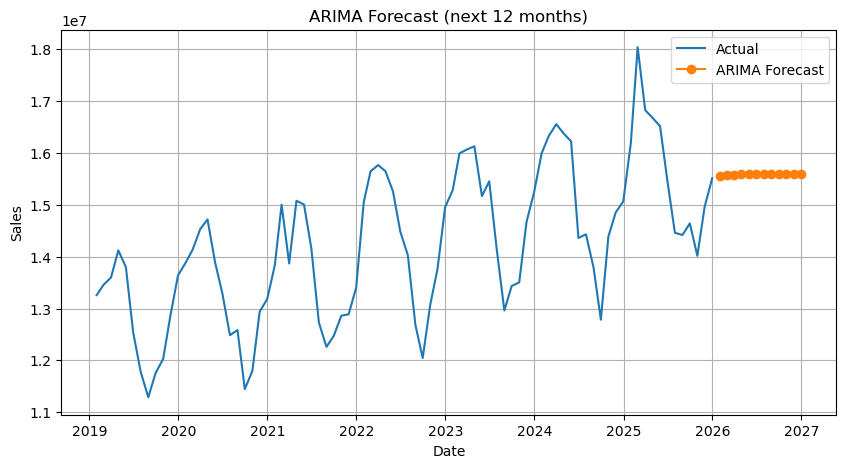

c:\Users\ARYAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\ARYAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


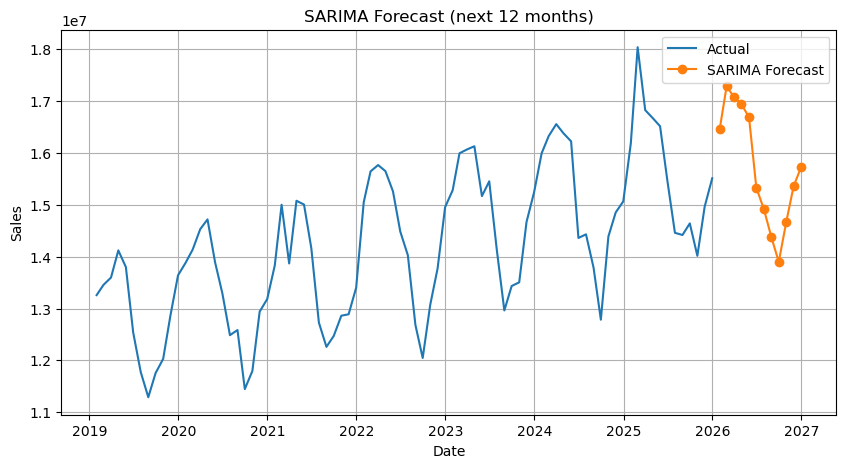

20:29:34 - cmdstanpy - INFO - Chain [1] start processing
20:29:35 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\ARYAN\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


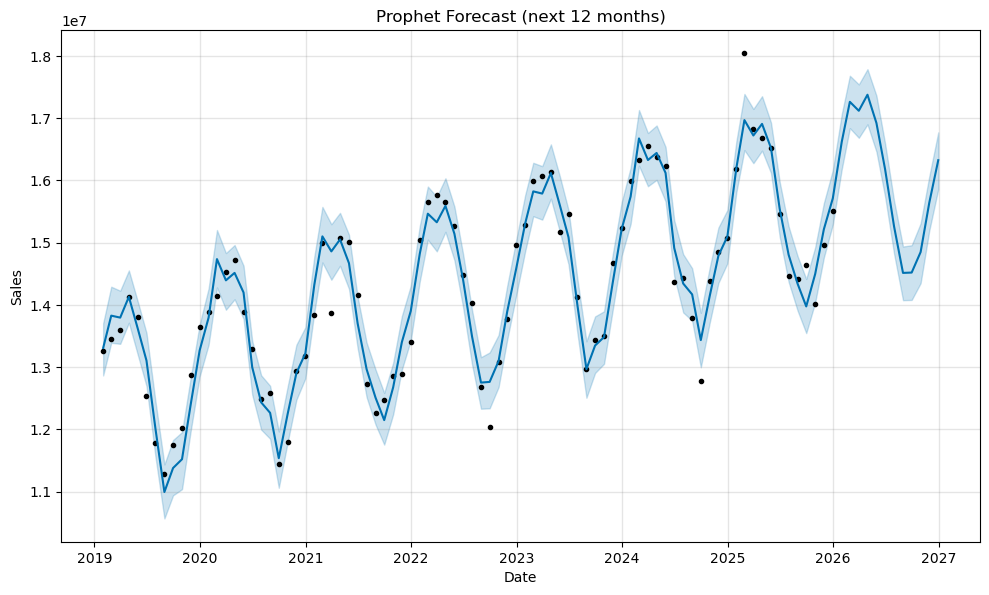

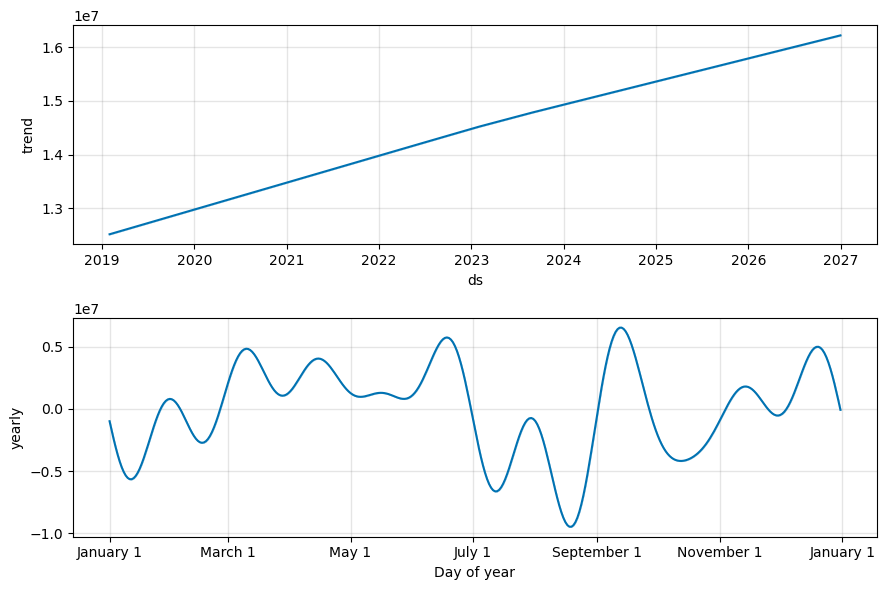

Saved files:
- forecast_arima_12m.csv
- forecast_sarima_12m.csv
- forecast_prophet_12m.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ============== 1) LOAD & PREP DATA ==============
FILE = "data/sample_nielsen_extended.xlsx"  # change path if needed
df = pd.read_excel(FILE, sheet_name="Sheet1")
df["date"] = pd.to_datetime(df["date"])

# monthly total value_sales (all brands/categories combined)
monthly = (
    df.groupby(pd.Grouper(key="date", freq="M"))["value_sales"]
      .sum()
      .reset_index()
      .rename(columns={"date": "ds", "value_sales": "y"})
      .sort_values("ds")
      .reset_index(drop=True)
)

# ============== 2) ARIMA (non-seasonal) ==============
from statsmodels.tsa.arima.model import ARIMA

series = monthly.set_index("ds")["y"]
arima_model = ARIMA(series, order=(1,1,1))      # simple, reasonable baseline
arima_fit = arima_model.fit()
arima_fc = arima_fit.forecast(steps=12)         # next 12 months
arima_out = arima_fc.reset_index()
arima_out.columns = ["ds", "yhat"]
arima_out.to_csv("forecast_arima_12m.csv", index=False)

# plot
plt.figure(figsize=(10,5))
plt.plot(series.index, series.values, label="Actual")
plt.plot(arima_out["ds"], arima_out["yhat"], marker="o", label="ARIMA Forecast")
plt.title("ARIMA Forecast (next 12 months)")
plt.xlabel("Date"); plt.ylabel("Sales"); plt.grid(True); plt.legend(); plt.show()

# ============== 3) SARIMA (seasonal ARIMA) ==============
# monthly data → m = 12 (yearly seasonality)
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(series, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)
sarima_fc = sarima_fit.get_forecast(steps=12)
sarima_mean = sarima_fc.predicted_mean
sarima_ci = sarima_fc.conf_int()
sarima_out = sarima_mean.reset_index()
sarima_out.columns = ["ds", "yhat"]
sarima_out.to_csv("forecast_sarima_12m.csv", index=False)

# plot
plt.figure(figsize=(10,5))
plt.plot(series.index, series.values, label="Actual")
plt.plot(sarima_out["ds"], sarima_out["yhat"], marker="o", label="SARIMA Forecast")
plt.title("SARIMA Forecast (next 12 months)")
plt.xlabel("Date"); plt.ylabel("Sales"); plt.grid(True); plt.legend(); plt.show()

# ============== 4) PROPHET (trend + yearly seasonality) ==============
from prophet import Prophet

m = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
m.fit(monthly)  # needs columns: ds, y

future = m.make_future_dataframe(periods=12, freq="M")
fcst = m.predict(future)
prophet_out = fcst[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(12)
prophet_out.to_csv("forecast_prophet_12m.csv", index=False)

# plots
fig1 = m.plot(fcst, xlabel="Date", ylabel="Sales")
plt.title("Prophet Forecast (next 12 months)")
plt.show()

fig2 = m.plot_components(fcst)
plt.show()

print("Saved files:")
print("- forecast_arima_12m.csv")
print("- forecast_sarima_12m.csv")
print("- forecast_prophet_12m.csv")


In [4]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).
    y_true : array-like of actual values
    y_pred : array-like of predicted values
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Example usage with your models:

# --- ARIMA ---
arima_pred = arima_fit.predict(start=series.index[0], end=series.index[-1])
mape_arima = mean_absolute_percentage_error(series, arima_pred)

# --- SARIMA ---
sarima_pred = sarima_fit.get_prediction(start=series.index[0], end=series.index[-1]).predicted_mean
mape_sarima = mean_absolute_percentage_error(series, sarima_pred)

# --- Prophet ---
prophet_pred = fcst.set_index("ds").loc[series.index, "yhat"]   # align with actual series
mape_prophet = mean_absolute_percentage_error(series, prophet_pred)

print(f"ARIMA MAPE:   {mape_arima:.2f}%")
print(f"SARIMA MAPE:  {mape_sarima:.2f}%")
print(f"Prophet MAPE: {mape_prophet:.2f}%")


ARIMA MAPE:   5.61%
SARIMA MAPE:  6.29%
Prophet MAPE: 1.88%
